In [ ]:
#Part 1:
#Use proper data cleansing techniques to ensure that you have the highest quality data to model this problem. 
#Detail your process and discuss the decisions you made to clean the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load dataset
df = pd.read_csv('/Users/kejiangyao/Desktop/ALY 6020/Module 2/car.csv')

In [3]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [7]:
#Convert ? to Null
df = df.replace('?',np.nan)

In [8]:
print(pd.DataFrame(df.isnull().sum()))

              0
MPG           0
Cylinders     0
Displacement  0
Horsepower    6
Weight        0
Acceleration  0
Model Year    0
US Made       0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    object 
 4   Weight        398 non-null    int64  
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   US Made       398 non-null    int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 25.0+ KB


In [13]:
#drop all records with at least 1 na value
df = df.dropna()

In [14]:
df = df.astype('int64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   MPG           392 non-null    int64
 1   Cylinders     392 non-null    int64
 2   Displacement  392 non-null    int64
 3   Horsepower    392 non-null    int64
 4   Weight        392 non-null    int64
 5   Acceleration  392 non-null    int64
 6   Model Year    392 non-null    int64
 7   US Made       392 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [16]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.283163,5.471939,194.410714,104.469388,2977.584184,15.186224,75.979592,0.625000
std,7.745896,1.705783,104.645191,38.491160,849.402560,2.743700,3.683737,0.484742
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.000000,73.000000,0.000000
50%,22.500000,4.000000,151.000000,93.500000,2803.500000,15.000000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.000000,79.000000,1.000000
max,46.000000,8.000000,455.000000,230.000000,5140.000000,24.000000,82.000000,1.000000


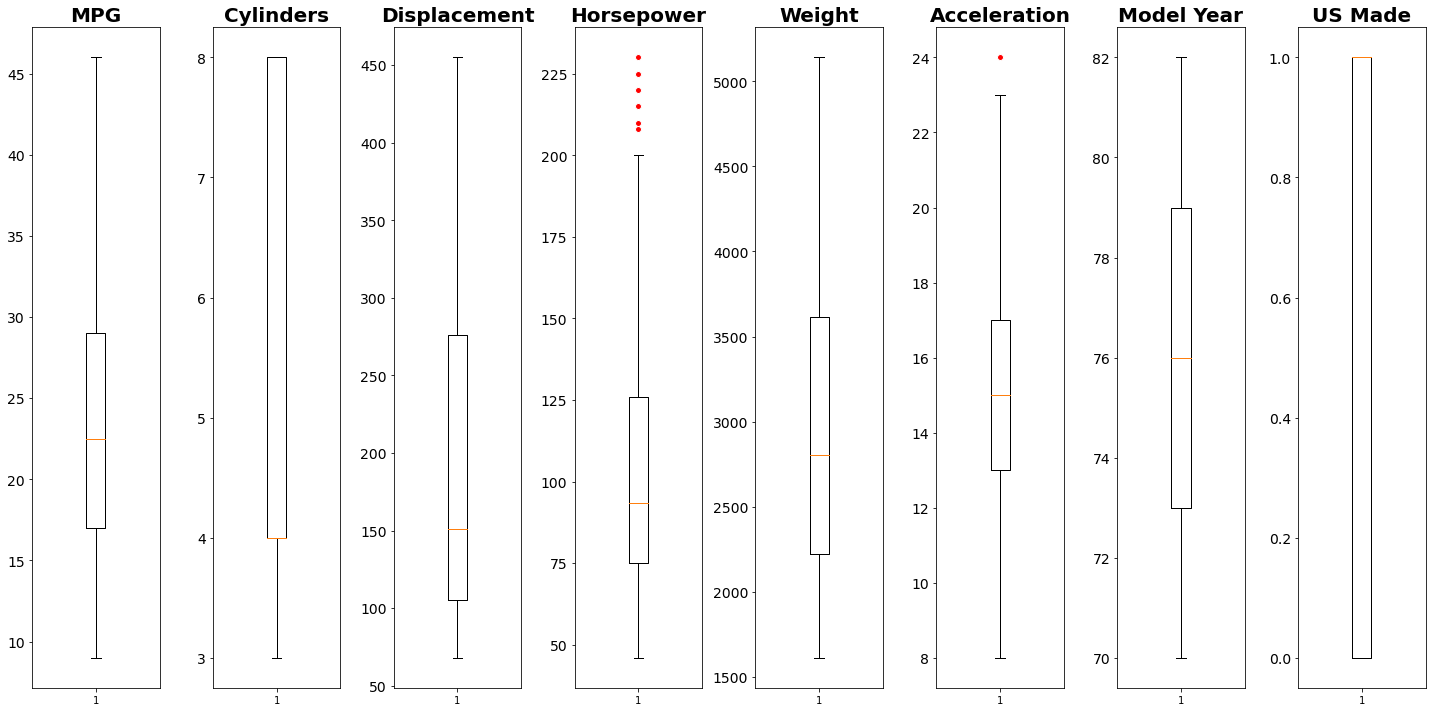

In [18]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

In [19]:
#Removing outliers from Horsepower and Acceleration
df = df[df.Horsepower <= 200]
df = df[df.Acceleration <=23]

In [20]:
df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,US Made
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,23.492105,5.413158,188.855263,101.686842,2942.426316,15.260526,76.084211,0.618421
std,7.599989,1.678778,99.150655,34.122383,826.694251,2.591445,3.631911,0.486415
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,0.000000
25%,17.000000,4.000000,103.250000,75.000000,2220.000000,14.000000,73.000000,0.000000
50%,23.000000,4.000000,145.500000,92.000000,2764.500000,15.000000,76.000000,1.000000
75%,29.000000,6.000000,258.000000,120.000000,3542.000000,17.000000,79.000000,1.000000
max,46.000000,8.000000,429.000000,200.000000,5140.000000,23.000000,82.000000,1.000000


In [ ]:
#Part 2:
#Build a linear regression model to accurately predict miles per gallon (MPG) based on the attributes of a vehicle. 
#Discuss the significant attributes and how they can help you build the proper car.

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
X = df.iloc[:, 1:8]
y = df.iloc[:, 0]

In [26]:
#Train, test split, sets aside 25% of the samples in the original dataset for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [27]:
# Apply multiple Linear Regression Model
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [28]:
# Generate Prediction on test set
lreg_y_pred = lreg.predict(X_test)

In [29]:
# calculating Mean Squared Error (mse)
mean_squared_error = np.mean((lreg_y_pred - y_test)**2)
print("Mean squared Error on test set : ", mean_squared_error)

Mean squared Error on test set :  7.8689561362587925


In [30]:
#display regression coefficients and R-squared value of model
print(lreg.coef_, lreg.score(X, y))

[-0.18294912  0.01986809 -0.04259865 -0.00637702 -0.03732718  0.75103161
 -2.78541728] 0.8165403901322276


In [31]:
import statsmodels.api as sm

In [32]:
#fit linear regression model
model = sm.OLS(y, X).fit()
#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    MPG   R-squared (uncentered):                   0.983
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              2998.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                   1.98e-323
Time:                        20:16:41   Log-Likelihood:                         -988.57
No. Observations:                 380   AIC:                                      1991.
Df Residuals:                     373   BIC:                                      2019.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [ ]:
#Part 3:
#Optimize the model using selection techniques, 
#explain whether the model can achieve the specified goals, 
#and describe which attributes contribute to higher MPG over others.

In [60]:
X = df.iloc[:, 1:8]
y = df.iloc[:, 0]

In [61]:
#drop columns
X = X.drop(columns=['Cylinders'])

In [62]:
#fit linear regression model
model = sm.OLS(y, X).fit()
#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    MPG   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              3494.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                        0.00
Time:                        20:33:36   Log-Likelihood:                         -989.23
No. Observations:                 380   AIC:                                      1990.
Df Residuals:                     374   BIC:                                      2014.
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [63]:
#drop columns
X = X.drop(columns=['Acceleration'])

In [40]:
#fit linear regression model
model = sm.OLS(y, X).fit()
#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    MPG   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              4175.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                        0.00
Time:                        20:25:59   Log-Likelihood:                         -990.53
No. Observations:                 380   AIC:                                      1991.
Df Residuals:                     375   BIC:                                      2011.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [64]:
#drop columns
X = X.drop(columns=['Displacement'])

In [65]:
#fit linear regression model
model = sm.OLS(y, X).fit()
#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    MPG   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.982
Method:                 Least Squares   F-statistic:                              5125.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                        0.00
Time:                        20:34:03   Log-Likelihood:                         -994.41
No. Observations:                 380   AIC:                                      1997.
Df Residuals:                     376   BIC:                                      2013.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [66]:
#drop columns
X = X.drop(columns=['Horsepower'])

In [67]:
#fit linear regression model
model = sm.OLS(y, X).fit()
#view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                    MPG   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              6716.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):                        0.00
Time:                        20:35:08   Log-Likelihood:                         -998.12
No. Observations:                 380   AIC:                                      2002.
Df Residuals:                     377   BIC:                                      2014.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------